In [1]:
using Plots

using DRRs

┌ Info: Precompiling DRRs [f21762e1-6399-47aa-8d92-ee0e28e21b73]
└ @ Base loading.jl:1423


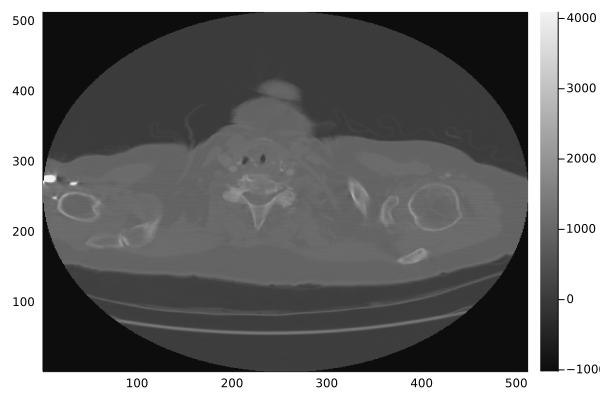

In [2]:
# Load the volume and get coordinate spacing
volume, ΔX, ΔY, ΔZ = read_dicom("../data/cxr")
nx, ny, nz = size(volume)
xs = 0:ΔX:(nx-1)*ΔX
ys = 0:ΔY:(ny-1)*ΔY
zs = 0:ΔZ:(nz-1)*ΔZ

heatmap(volume[:, :, 133], c=:grays) |> display

In [24]:
# Create the camera and detector plane
# We assume the volume is centered at (0,0,0)
# Top corner is (360,360,330)
center = [0, 0, 0]
camera = Camera(center)

center = [330, 330, 300]
normal = [-1., -1., -1.]
height, width = 201, 201
Δx, Δy = 4,4
detector = Detector(center, normal, height, width, Δx, Δy)

drr = DRR(volume, ΔX, ΔY, ΔZ, detector, camera, 0.01, sample)
heatmap(drr, c=:grays) |> display

drr = DRR(volume, ΔX, ΔY, ΔZ, detector, camera, 0.01, trilinear)
heatmap(drr, c=:grays) |> display

Detector([330.0, 330.0, 300.0], [-1.0, -1.0, -1.0], 201, 201, 4.0, 4.0)

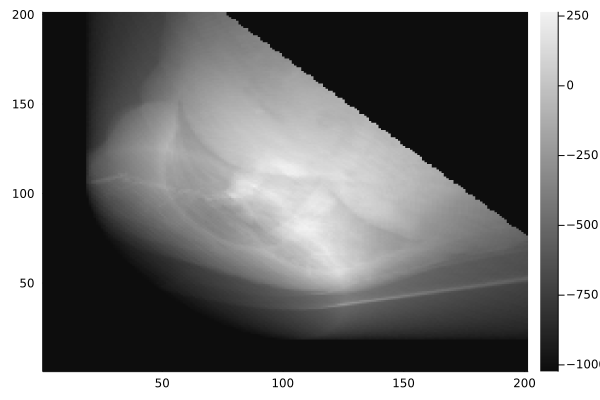

In [28]:
drr = DRR(volume, ΔX, ΔY, ΔZ, detector, camera, 0.01, sample)
heatmap(drr, c=:grays) |> display

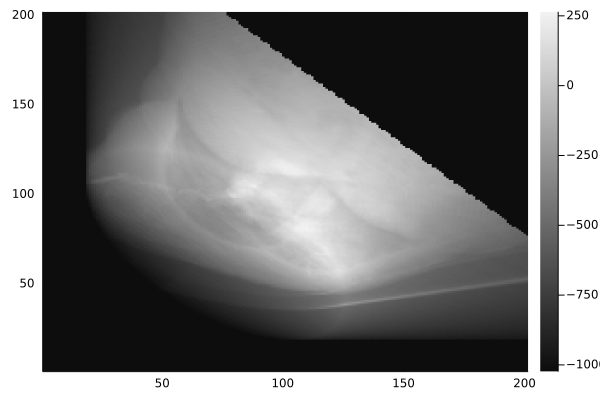

In [29]:
drr = DRR(volume, ΔX, ΔY, ΔZ, detector, camera, 0.01, trilinear)
heatmap(drr, c=:grays) |> display

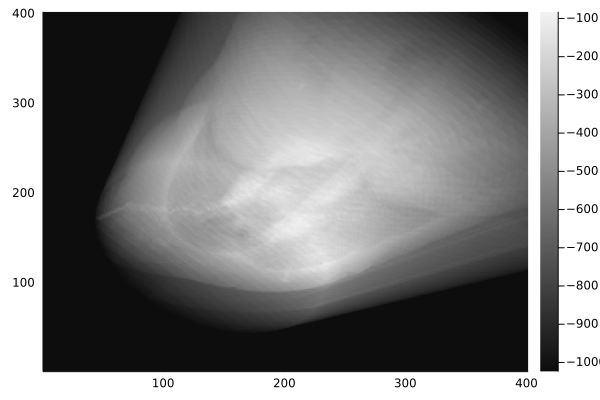

In [40]:
# Create the camera and detector plane
# We assume the volume is centered at (0,0,0)
# Top corner is (360,360,330)
center = [-100, -100, -100]
camera = Camera(center)

center = [350, 350, 350]
normal = [-1., -1., -3]
height, width = 401, 401
Δx, Δy = 2, 2
detector = Detector(center, normal, height, width, Δx, Δy)

drr = DRR(volume, ΔX, ΔY, ΔZ, detector, camera, 0.01, sample)
heatmap(drr, c=:grays) |> display

# drr = DRR(volume, ΔX, ΔY, ΔZ, detector, camera, 0.1, trilinear)
# heatmap(drr, c=:grays) |> display